
--- Linear Regression Coefficients ---
X1                                      : 5.4407
X2                                      : -0.2708
X3                                      : -0.0048
X4                                      : 1.0914
X5                                      : 229.0431
X6                                      : -29.4926

--- Polynomial Regression (degree=3) Coefficients ---
1                                                                               : 0.0338
X1                                                                              : -0.0021
X2                                                                              : 0.0005
X3                                                                              : -0.0065
X4                                                                              : -0.0054
X5                                                                              : 0.0028
X6                                                                  

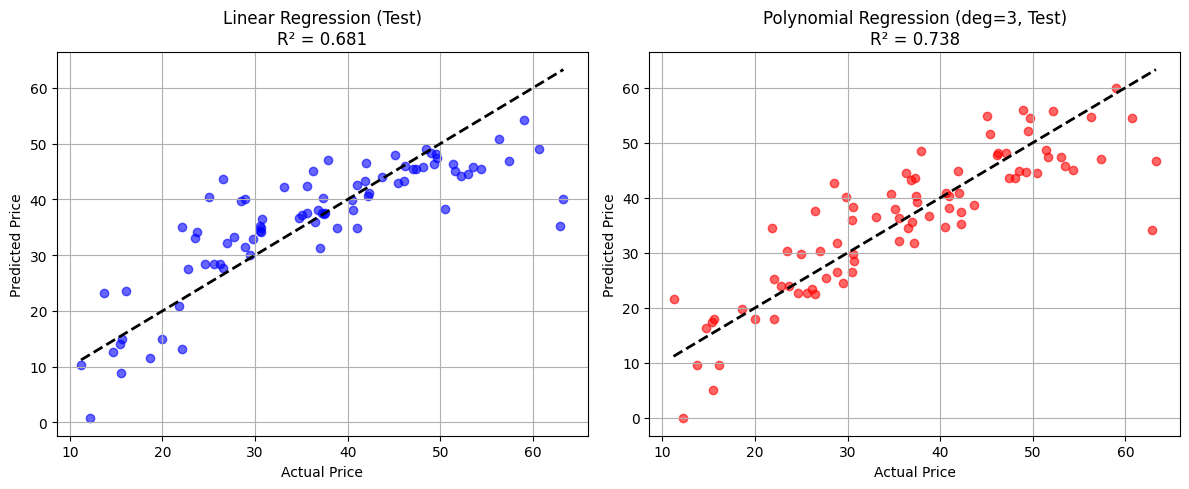

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load and preprocess dataset
df = pd.read_csv('Real estate valuation data set.csv')

# Extract feature columns and target variable
feature_cols = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target_col = 'Y house price of unit area'

# Clean column names
X = df[feature_cols].copy()
X.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
y = df[target_col].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_test = linear_model.predict(X_test)

# Train Polynomial Regression model
poly_transformer = PolynomialFeatures(degree=3)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly_test = poly_model.predict(X_test_poly)

# Display linear regression coefficients
print("\n--- Linear Regression Coefficients ---")
for name, coef in zip(X.columns, linear_model.coef_):
    print(f"{name:20s}: {coef:.4f}")

# Display polynomial regression coefficients
print("\n--- Polynomial Regression Coefficients ---")
poly_feature_names = poly_transformer.get_feature_names_out(X.columns)
for name, coef in zip(poly_feature_names, poly_model.coef_):
    print(f"{name.replace(' ', ' * '):50s}: {coef:.4f}")

# Evaluate models on test set using R² score
r2_linear_test = r2_score(y_test, y_pred_linear_test)
r2_poly_test = r2_score(y_test, y_pred_poly_test)

print(f"\nLinear Regression Test R² Score: {r2_linear_test:.4f}")
print(f"Polynomial Regression (degree = 3) Test R² Score: {r2_poly_test:.4f}")

# Visualize actual vs predicted prices on test set
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (Test)\nR² = {r2_linear_test:.3f}')
plt.grid(True)

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly_test, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Polynomial Regression (deg=3, Test)\nR² = {r2_poly_test:.3f}')
plt.grid(True)

plt.tight_layout()
plt.show()